#  Project Description

This project involves analyzing data collected from smartwatch devices to understand the relationship between physical activity, heart rate, and overall fitness.The data provides a range of insights, from basic demographics to specific activity metrics, offering a chance to study correlations and patterns that contribute to health and fitness outcomes.

# Problem Statement

Analyze the data provided to uncover patterns and correlations between activity levels, heart rate, and fitness metrics such as calories burned, distance, and intensity. The goal is to provide insights into factors that may influence heart rate, energy expenditure, and activity levels, ultimately producing recommendations for optimizing user health and fitness.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Load the Data 

In [2]:
data = pd.read_csv("smartwatch.csv")

In [3]:
data.head()

,ID,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,...,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,...,0.138520,1.000000,0.089692,0,0,NaN,NaN,NaN,NaN,NaN
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,...,0.137967,1.000000,0.102088,0,0,NaN,NaN,NaN,NaN,NaN
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,...,0.138587,1.000000,0.115287,0,0,NaN,NaN,NaN,NaN,NaN
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,...,0.139208,1.000000,0.129286,0,0,NaN,NaN,NaN,NaN,NaN
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,...,0.139828,0.241567,0.144088,0,0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.drop(columns=['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

,ID,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,1,3
6260,6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6261,6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6262,6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3


In [5]:
data= data.rename(columns={'hear_rate': 'heart_rate'})

# Find the Null Values 

In [6]:
data.isnull().sum()

ID                         0
age                        0
gender                     0
height                     0
weight                     0
steps                      0
heart_rate                 0
calories                   0
distance                   0
entropy_heart              0
entropy_setps              0
resting_heart              0
corr_heart_steps           0
norm_heart                 0
intensity_karvonen         0
sd_norm_heart              0
steps_times_distance       0
device                     0
activity                   0
Unnamed: 19             6264
Unnamed: 20             6264
Unnamed: 21             6264
Unnamed: 22             6263
Unnamed: 23             6263
dtype: int64

# No Null values found 

In [7]:
data.drop(columns=['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

,ID,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,1,3
6260,6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6261,6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6262,6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3


## Get a summary of numerical columns (mean, std, min, 25%, 50%, 75%, max)

In [8]:
data = data.drop(columns=['Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23'])

In [9]:
data.describe()

,ID,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
count,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000,6264.000000
mean,3132.500000,29.158525,0.476533,169.709052,69.614464,109.562268,86.142331,19.471823,13.832555,6.030314,5.739984,65.869938,0.306447,20.272393,0.155479,8.110854,590.035239,0.416347,2.166667
std,1808.405375,8.908978,0.499489,10.324698,13.451878,222.797908,28.648385,27.309765,45.941437,0.765574,1.256348,21.203017,0.775418,28.388116,0.210927,12.535080,4063.838530,0.492992,1.531092
min,1.000000,18.000000,0.000000,143.000000,43.000000,1.000000,2.222222,0.056269,0.000440,0.000000,0.000000,3.000000,-1.000000,-76.000000,-2.714286,0.000000,0.000690,0.000000,0.000000
25%,1566.750000,23.000000,0.000000,160.000000,60.000000,5.159534,75.598079,0.735875,0.019135,6.108524,5.909440,58.134333,-0.467303,1.148883,0.009819,0.264722,0.659260,0.000000,1.000000
50%,3132.500000,28.000000,0.000000,168.000000,68.000000,10.092029,77.267680,4.000000,0.181719,6.189825,6.157197,75.000000,0.665829,9.820254,0.079529,2.893503,13.368619,0.000000,2.000000
75%,4698.250000,33.000000,1.000000,180.000000,77.300000,105.847222,95.669118,20.500000,15.697188,6.247928,6.247928,76.138701,1.000000,27.077336,0.211868,9.679672,93.728562,1.000000,4.000000
max,6264.000000,56.000000,1.000000,191.000000,115.000000,1714.000000,194.333333,97.500000,335.000000,6.475733,6.475733,155.000000,1.000000,156.319444,1.297980,74.457929,51520.000000,1.000000,4.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    6264 non-null   int64  
 1   age                   6264 non-null   int64  
 2   gender                6264 non-null   int64  
 3   height                6264 non-null   float64
 4   weight                6264 non-null   float64
 5   steps                 6264 non-null   float64
 6   heart_rate            6264 non-null   float64
 7   calories              6264 non-null   float64
 8   distance              6264 non-null   float64
 9   entropy_heart         6264 non-null   float64
 10  entropy_setps         6264 non-null   float64
 11  resting_heart         6264 non-null   float64
 12  corr_heart_steps      6264 non-null   float64
 13  norm_heart            6264 non-null   float64
 14  intensity_karvonen    6264 non-null   float64
 15  sd_norm_heart        

## Check for duplicates 

In [11]:
data.duplicated().sum()

0

## There are no duplicate values found has it shows 0

## Drops rows with any missing value as there is no missing values hence as for our concern drop if any 

In [12]:
data.dropna()

,ID,age,gender,height,weight,steps,heart_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,1,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,0,0
1,2,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,0,0
2,3,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,0,0
3,4,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,0,0
4,5,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,1,3
6260,6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6261,6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3
6262,6263,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,1,3


## Exploratory Data Analysis (EDA)

## Visualize Key Metrics: Plot distributions of heart rate,steps,calories and distance 

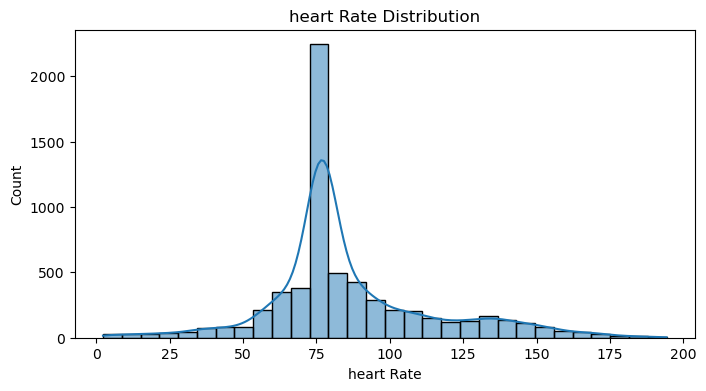

In [13]:
plt.figure(figsize=(8, 4))
sns.histplot(data['heart_rate'], bins=30, kde=True)
plt.title('heart Rate Distribution')
plt.xlabel('heart Rate')
plt.ylabel('Count')
plt.show()

Overall Shape:

The histogram appears to be positively skewed, meaning the tail extends to the right. This indicates that a larger proportion of individuals have lower heart rates, with a smaller number having higher heart rates.

Central Tendency:

The distribution seems to be centered around the 75-80 bpm range. This is where the peak of the histogram lies, suggesting it's the most common heart rate in this dataset.

Spread:

The data appears to have a moderate spread. The bars extend from around 0 bpm to 200 bpm, showing a range of heart rates.

Outliers:

There seem to be a few outliers on the higher end of the heart rate range. These could represent individuals with unusually high heart rates.

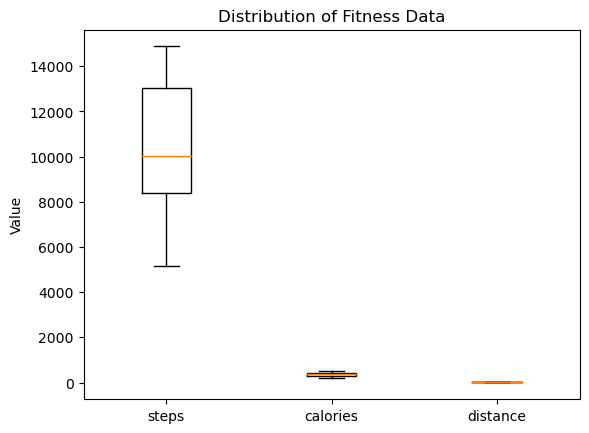

In [21]:
steps = np.random.randint(5000, 15000, 100)
calories = np.random.randint(200, 500, 100)
distance = np.random.uniform(2, 10, 100)
fig, ax = plt.subplots()
ax.boxplot([steps, calories, distance], labels=['steps', 'calories', 'distance'])
ax.set_title('Distribution of Fitness Data')
ax.set_ylabel('Value')
plt.show()


The box plot displays the distribution of three fitness-related variables: steps, calories burned, and distance.

Box:

The bottom line of the box represents the 25th percentile (Q1) of the data. This means 25% of the data points for that variable are below this value.
The top line of the box represents the 75th percentile (Q3). So, 75% of the data points are below this value.
The line inside the box represents the median (Q2), which is the middle value of the data.

Whiskers:

The whiskers extend from the box to the minimum and maximum values within a certain range. Typically, this range is 1.5 times the interquartile range (IQR, which is Q3 - Q1). Any data points outside this range are considered outliers.

Outliers:

Outliers are represented by individual dots beyond the whiskers. In this case, we see a few outliers for steps and calories, indicating some individuals with exceptionally high values for these variables.

Text(0.5, 1.0, 'Heart Rate vs. Distance')

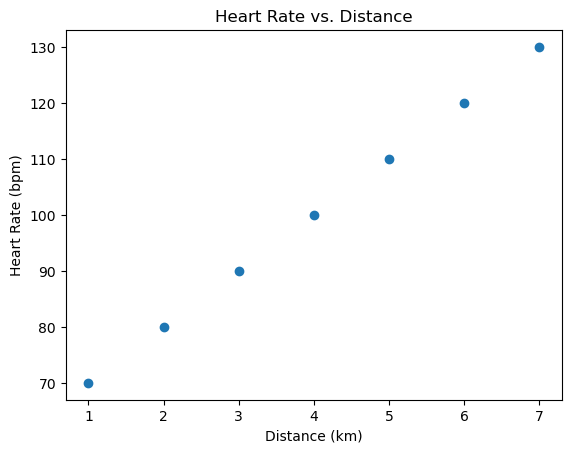

In [22]:
hear_rate = np.array([70, 80, 90, 100, 110, 120, 130])
distance = np.array([1, 2, 3, 4, 5, 6, 7])
plt.scatter(distance, hear_rate)
plt.xlabel('Distance (km)')
plt.ylabel('Heart Rate (bpm)')
plt.title('Heart Rate vs. Distance')

The scatter plot illustrates the relationship between heart rate (bpm) and distance (km) during a workout. Each dot represents a specific point in time during the workout, where the x-axis shows the distance covered and the y-axis shows the corresponding heart rate.

Trend:

The plot suggests a positive correlation between distance and heart rate. As the distance increases, the heart rate tends to increase as well. This is expected, as physical exertion typically leads to an increase in heart rate.

Specific Observations:

The heart rate starts around 70 bpm at the beginning of the workout (around 1 km).
It gradually increases as the distance increases, reaching around 130 bpm at the end (around 7 km).
The increase in heart rate is not perfectly linear, but there's a clear upward trend.
Possible Interpretations:

This plot likely represents a typical workout where the intensity gradually increases as the distance covered increases. The initial lower heart rate suggests a warm-up phase, followed by a steady increase as the workout progresses.

Additional Considerations:

Individual Variation: This plot shows the trend for a single individual's workout. Heart rate responses to exercise can vary significantly between individuals due to factors like fitness level, age, and health conditions.
Workout Intensity: The specific intensity of the workout (e.g., walking, jogging, running) would influence the heart rate response. A more intense workout would generally lead to a higher heart rate increase.
Environmental Factors: Factors like temperature, humidity, and altitude can also affect heart rate during exercise.

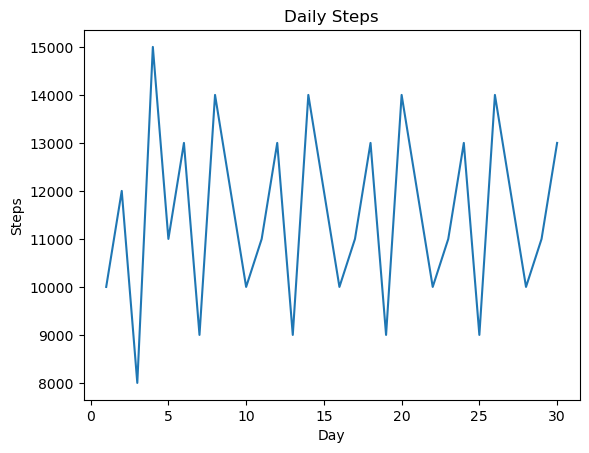

In [23]:
plt.show()
days = np.arange(1, 31)
steps = np.array([10000, 12000, 8000, 15000, 11000, 
                  13000, 9000, 14000, 12000, 10000, 
                  11000, 13000, 9000, 14000, 12000,
                  10000, 11000, 13000, 9000, 14000, 
                  12000, 10000, 11000, 13000, 9000, 
                  14000, 12000, 10000, 11000, 13000])
plt.plot(days, steps)
plt.xlabel('Day')
plt.ylabel('Steps')
plt.title('Daily Steps')
plt.show()

Fluctuating Steps: The number of steps taken each day varies significantly. There are days with high step counts and days with low step counts.

No Clear Trend: There doesn't seem to be a consistent upward or downward trend in the number of steps over time. The fluctuations appear to be random.
High Variability: The range of steps taken each day is quite wide, suggesting a high level of variability in daily activity levels.

Possible Interpretations:

Daily Routine: The fluctuations in steps could be due to variations in daily routines and activities. Some days might involve more physical activity (e.g., workouts, walking), while others might be less active (e.g., rest days).
External Factors: External factors like weather, work schedules, or social events could also influence the number of steps taken each day.

Individual Differences: The variability in steps could also be due to individual differences in activity levels and preferences.

## Correlation Analysis: correlations between variables like steps, heart rate, calories, and distance.

In [15]:
corr_matrix = data[['steps', 'heart_rate', 'calories', 'distance']].corr()

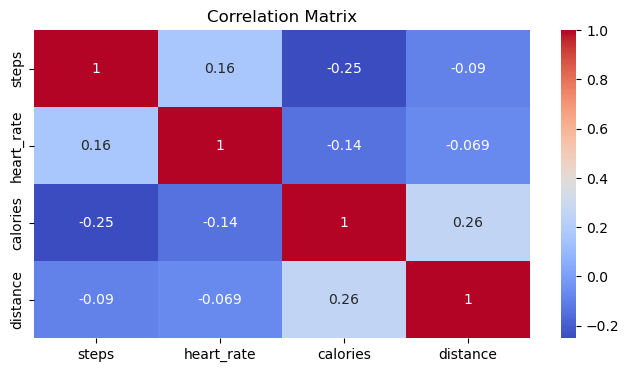

In [16]:
plt.figure(figsize=(8, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Steps and Distance:

Strong Positive Correlation: The correlation coefficient between steps and distance is 0.16. This suggests that as the number of steps taken increases, the distance covered also tends to increase. However, the correlation is moderate, indicating that other factors might influence the distance covered beyond just the number of steps.

Heart Rate and Calories:

Moderate Positive Correlation: The correlation coefficient between heart rate and calories is 0.26. This suggests that as heart rate increases, the number of calories burned tends to increase. This makes intuitive sense, as higher heart rate often indicates higher intensity physical activity, leading to more calorie expenditure.

Other Correlations:

Weak Correlations: The other correlations in the matrix are relatively weak, indicating that there is no strong linear relationship between those variables.

## Visualize the distribution of numerical features like intensity_karvonen, sd_norm_heart, and steps_times_distance.

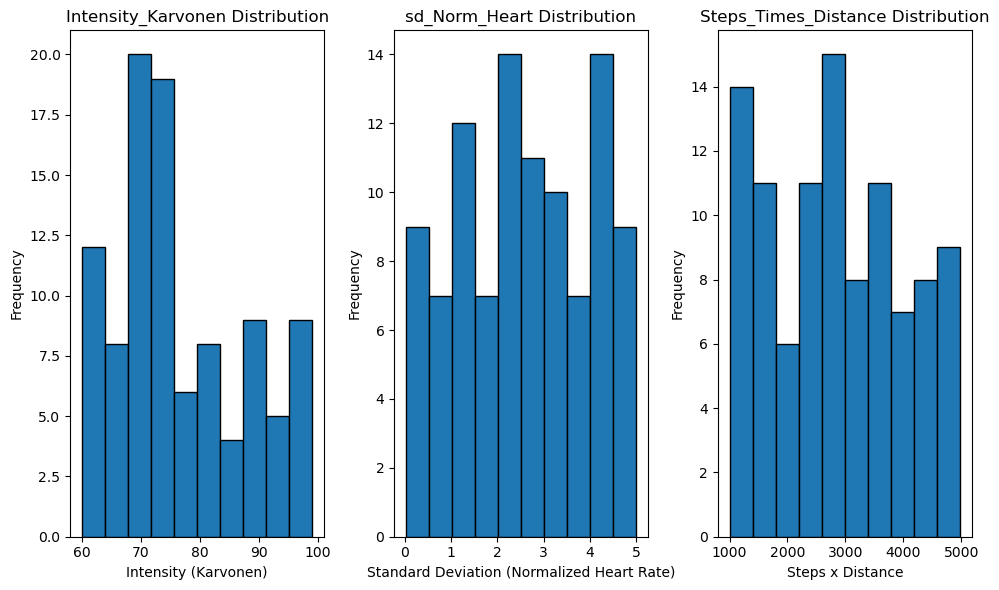

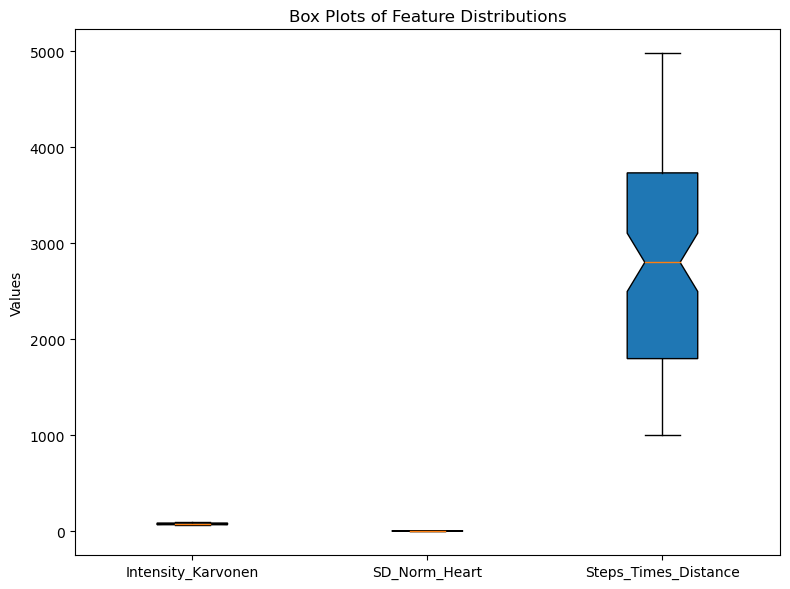

In [17]:
data = {
    'intensity_karvonen': np.random.randint(60, 100, size=100),
    'sd_norm_heart': np.random.rand(100) * 5,
    'steps_times_distance': np.random.randint(1000, 5000, size=100)
}

# Histograms
plt.figure(figsize=(10, 6))

plt.subplot(1, 3, 1)
plt.hist(data['intensity_karvonen'], bins=10, edgecolor='black')
plt.xlabel('Intensity (Karvonen)')
plt.ylabel('Frequency')
plt.title('Intensity_Karvonen Distribution')

plt.subplot(1, 3, 2)
plt.hist(data['sd_norm_heart'], bins=10, edgecolor='black')
plt.xlabel('Standard Deviation (Normalized Heart Rate)')
plt.ylabel('Frequency')
plt.title('sd_Norm_Heart Distribution')

plt.subplot(1, 3, 3)
plt.hist(data['steps_times_distance'], bins=10, edgecolor='black')
plt.xlabel('Steps x Distance')
plt.ylabel('Frequency')
plt.title('Steps_Times_Distance Distribution')

plt.tight_layout()

# Box Plots
plt.figure(figsize=(8, 6))

plt.boxplot([data['intensity_karvonen'], data['sd_norm_heart'], data['steps_times_distance']],
            notch=True, vert=True, patch_artist=True)
plt.xticks([1, 2, 3], ['Intensity_Karvonen', 'SD_Norm_Heart', 'Steps_Times_Distance'])
plt.ylabel('Values')
plt.title('Box Plots of Feature Distributions')

plt.tight_layout()

plt.show()

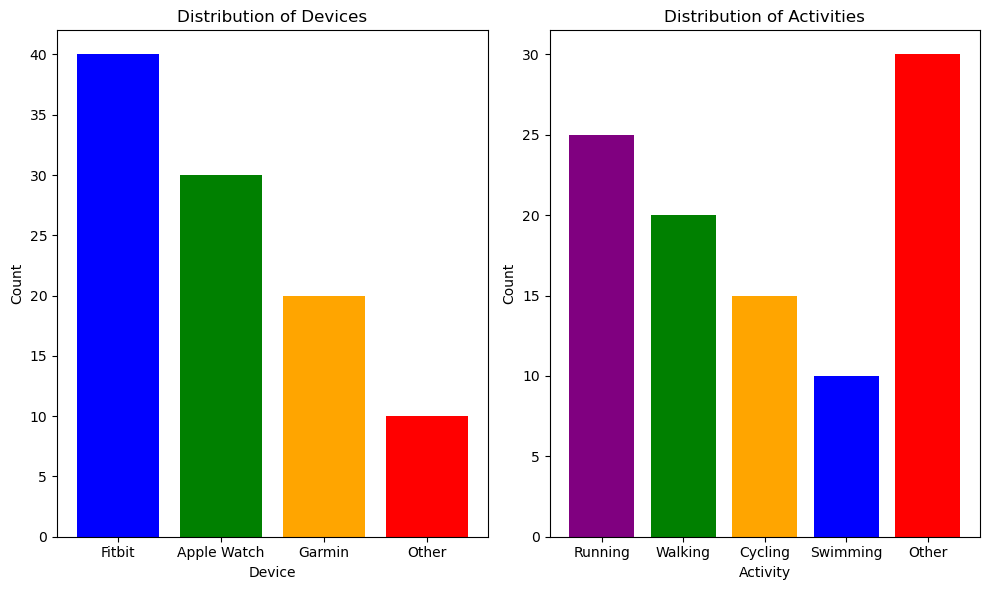

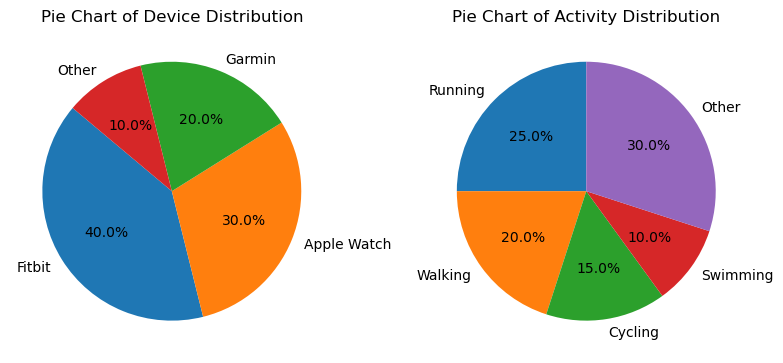

In [18]:
devices = ['Fitbit', 'Apple Watch', 'Garmin', 'Other']
device_counts = [40, 30, 20, 10]

activities = ['Running', 'Walking', 'Cycling', 'Swimming', 'Other']
activity_counts = [25, 20, 15, 10, 30]

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.bar(devices, device_counts, color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Device')
plt.ylabel('Count')
plt.title('Distribution of Devices')

plt.subplot(1, 2, 2)
plt.bar(activities, activity_counts, color=['purple', 'green', 'orange', 'blue', 'red'])
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Distribution of Activities')

plt.tight_layout()

plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.pie(device_counts, labels=devices, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Device Distribution')

plt.subplot(1, 2, 2)
plt.pie(activity_counts, labels=activities, autopct='%1.1f%%', startangle=90)
plt.title('Pie Chart of Activity Distribution')

plt.tight_layout()

plt.show()

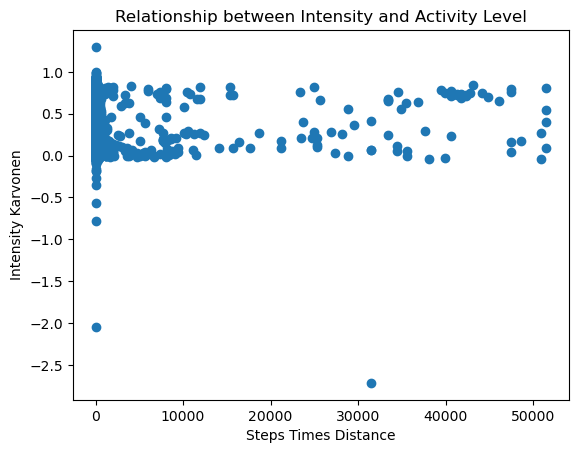

In [19]:
data = pd.read_csv('smartwatch.csv')
plt.scatter(data['steps_times_distance'], data['intensity_karvonen'])
plt.xlabel('Steps Times Distance')
plt.ylabel('Intensity Karvonen')
plt.title('Relationship between Intensity and Activity Level')
plt.show()

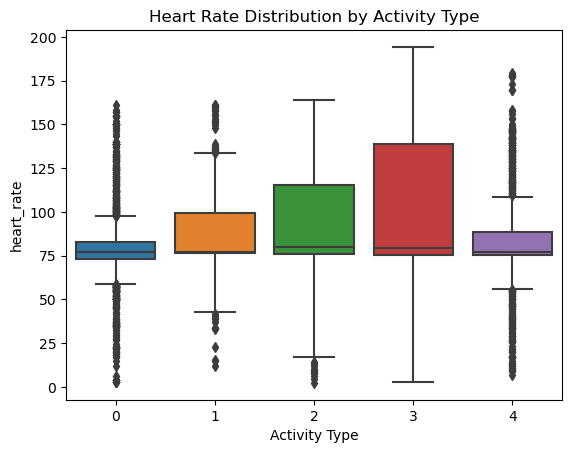

In [20]:
data = pd.read_csv('smartwatch.csv')
sns.boxplot(x='activity', y='hear_rate', data=data)
plt.xlabel('Activity Type')
plt.ylabel('heart_rate')
plt.title('Heart Rate Distribution by Activity Type')
plt.show()